In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 

import seaborn as sns 

from datetime import datetime 

import ast  # Abstract Syntax Trees - I used it to prepare syntax before transforming strings into dictionaries

In [2]:
# Funcrion to simultaneously plot the rate of several columns in the dataframe

plt.rcParams["figure.figsize"] = (30,15)



def plot_pass_rate(features, labels, title=' ',  N=3500):
    #x =  list(df["created_at_face"]) 
    
    plt.rcParams["figure.figsize"] = (30,15)
    plt.rcParams.update({'font.size': 22})
    
    
    for i in range(len(features)):
        x =  list(df["created_at_face"])
        y = pd.DataFrame(features[i].astype(int))
        
        rate = y.rolling(window = N).mean() #N moving average
        
        start_index = len(x) - len(rate)
        x = x[start_index:]
        label = labels[i]

        plt.plot(x, rate,label= label.format(i=i))
        
    
    plt.grid()
    plt.legend(loc='best',prop={'size': 25})
    plt.ylabel("Rate",fontsize=25)
    plt.xlabel("Time",fontsize=25)
    plt.title(title,fontsize=25)
    plt.show()
    

In [3]:
# Function to simultaneously plot lists with different scales


def plot_dif_scale(y1, y2, label1, label2, title):
    
    plt.rcParams['figure.figsize'] = (30, 15)
    
    fig, ax1 = plt.subplots()
    
    plt.xlabel("Time",fontsize=25)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax1.plot(y1, color='r',label = label1)
    
    ax2.plot(y2, color = 'b', label = label2)
    
    ax1.set_ylabel("Rate",fontsize=25)
    ax2.set_ylabel("Attempts",fontsize=25)
    
    
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.legend(bbox_to_anchor=(0.1, 0.65), loc='center left', prop={'size': 25})
    plt.title(title, fontsize=25)
    

## 1. Import dataframes

In [4]:
df_docs = pd.read_csv('doc_reports.csv', index_col=0) #import doc_reports data into a dataframe
df_docs.shape #size of the dataframe

(176404, 18)

In [5]:
df_docs.head() #first 5 rows of the dataframe

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


#### 1.2 Importing 'Faces Similarity Report'

In [6]:
df_faces = pd.read_csv('facial_similarity_reports.csv', index_col=0) #import facial_similarity_reports data into a dataframe

In [7]:
df_faces.shape #size of the dataframe

(176404, 8)

In [8]:
df_faces.head() #first 5 rows of the dataframe

,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


## 2. Exploration and preparation of data: null values, categorical data

### 2.1 docs dataframe

In [9]:
#null values in docs per column

df_docs.isna().sum()

user_id                                    0
result                                     0
visual_authenticity_result             26114
image_integrity_result                     1
face_detection_result                  26143
image_quality_result                       1
created_at                                 0
supported_document_result                504
conclusive_document_quality_result     81187
colour_picture_result                  81182
data_validation_result                 33430
data_consistency_result                84175
data_comparison_result                173856
attempt_id                                 0
police_record_result                   31847
compromised_document_result           130898
properties                                 0
sub_result                                 0
dtype: int64

In [10]:
df_docs['result'].value_counts()

clear       132402
consider     44002
Name: result, dtype: int64

In [11]:
# Values in each column

for column in df_docs.columns:
    
    print(str(column) + ' : ' + str(df_docs[column].unique()) + '\n')
    

user_id : ['ab23fae164e34af0a1ad1423ce9fd9f0' '15a84e8951254011b47412fa4e8f65b8'
 'ffb82fda52b041e4b9af9cb4ef298c85' ... '8b47d72c363e4591861f523dd7487f20'
 '65c49a09d299486091b6586487679b87' 'f0a1721abb544ea4896cd53716b3fd2b']

result : ['consider' 'clear']

visual_authenticity_result : ['consider' 'clear' nan]

image_integrity_result : ['clear' 'consider' nan]

face_detection_result : ['clear' nan 'consider']

image_quality_result : ['clear' 'unidentified' nan]

created_at : ['2017-06-20T23:12:57Z' '2017-06-20T23:16:04Z' '2017-06-20T17:59:49Z' ...
 '2017-06-20T22:27:40Z' '2017-06-20T22:35:40Z' '2017-06-20T22:50:59Z']

supported_document_result : ['clear' nan 'unidentified']

conclusive_document_quality_result : [nan 'clear' 'consider']

colour_picture_result : [nan 'clear' 'consider']

data_validation_result : ['clear' nan 'consider']

data_consistency_result : ['clear' nan 'consider']

data_comparison_result : [nan 'clear' 'consider']

attempt_id : ['050a0596de424fab83c433eaa18b3f8d

In [12]:
# all columns with non-unique categorical data to encode: all except user_id, attempt_it, created_at and properties

eval_columns = ['result', 'visual_authenticity_result',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result',  'police_record_result',
       'compromised_document_result']

In [13]:
df_docs[df_docs.result == 'clear']

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear
5,6af503bb8b7d4054b13b4206ab4d30ff,clear,clear,clear,clear,clear,2017-06-20T18:08:50Z,clear,NaN,NaN,clear,clear,NaN,40475bea718e4eefa1681badad872a63,clear,NaN,"{'gender': 'Male', 'nationality': 'BRA', 'docu...",clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181987,c7f99ee763bf45d289019c6ac2cbd919,clear,clear,clear,clear,clear,2017-06-20T22:25:53Z,clear,NaN,NaN,clear,clear,NaN,72a2cccc9e9942deb5274a16536bf2d0,clear,NaN,"{'gender': 'Female', 'nationality': 'CHN', 'do...",clear
181988,8b47d72c363e4591861f523dd7487f20,clear,clear,clear,clear,clear,2017-06-20T22:27:40Z,clear,NaN,NaN,clear,NaN,NaN,8c83017191204a3887c2d47ca2d998ce,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
181989,3d16e02c245a4f1a8a76662ad933d5c4,clear,clear,clear,clear,clear,2017-06-20T22:25:59Z,clear,NaN,NaN,clear,clear,NaN,bfea35bcb6a940118ca5816cd8ffcae7,clear,NaN,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear
181990,65c49a09d299486091b6586487679b87,clear,clear,clear,clear,clear,2017-06-20T22:35:40Z,clear,NaN,NaN,clear,clear,NaN,9190cf28b35b425083bdb41e121822fe,clear,NaN,"{'gender': 'Male', 'nationality': 'PRT', 'docu...",clear


#### To encode the categorical data I will take 'clear'=1 and 'consider'=0 (as well as the other categorical data) because if we take the mean of a column values for a certain 'created_at' date we have immediately the pass rate.

In [14]:
encode_map = {'clear': 1, 'consider' : 0, 'unidentified':0} #, 'caution':0, 'suspected':0, 'rejected':0}

In [15]:
for column in eval_columns:
    df_docs[column] = df_docs[column].map(encode_map)

In [16]:
df_docs.head()

,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,ab23fae164e34af0a1ad1423ce9fd9f0,0,0.0,1.0,1.0,1.0,2017-06-20T23:12:57Z,1.0,NaN,NaN,1.0,1.0,NaN,050a0596de424fab83c433eaa18b3f8d,1.0,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,15a84e8951254011b47412fa4e8f65b8,1,1.0,1.0,1.0,1.0,2017-06-20T23:16:04Z,1.0,NaN,NaN,1.0,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,1.0,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,ffb82fda52b041e4b9af9cb4ef298c85,1,1.0,1.0,1.0,1.0,2017-06-20T17:59:49Z,1.0,NaN,NaN,1.0,1.0,NaN,f9f84f3055714d8e8f7419dc984d1769,1.0,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,bd4a8b3e3601427e88aa1d9eab9f4290,1,1.0,1.0,1.0,1.0,2017-06-20T17:59:38Z,1.0,NaN,NaN,1.0,1.0,NaN,10a54a1ecf794404be959e030f11fef6,1.0,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,f52ad1c7e69543a9940c3e7f8ed28a39,1,1.0,1.0,1.0,1.0,2017-06-20T18:08:09Z,1.0,NaN,NaN,1.0,1.0,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,1.0,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


### 2.2 faces dataframe

In [17]:
#null values in faces per column

df_faces.isna().sum()

user_id                              0
result                               1
face_comparison_result           10397
created_at                           0
facial_image_integrity_result      463
visual_authenticity_result       26114
properties                           0
attempt_id                           0
dtype: int64

In [18]:
df_faces['result'].unique()

array(['clear', 'consider', nan], dtype=object)

#### I will eliminate the row with the null value of 'result' in 'faces' as it adds no value to fill it in considering the purpose of the analysis


In [19]:
df_faces.dropna(subset = ['result'])

,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9
...,...,...,...,...,...,...,...,...
181987,c7f99ee763bf45d289019c6ac2cbd919,clear,clear,2017-06-20T22:25:53Z,clear,clear,{},72a2cccc9e9942deb5274a16536bf2d0
181988,8b47d72c363e4591861f523dd7487f20,clear,clear,2017-06-20T22:27:40Z,clear,clear,{},8c83017191204a3887c2d47ca2d998ce
181989,3d16e02c245a4f1a8a76662ad933d5c4,clear,clear,2017-06-20T22:25:59Z,clear,clear,{},bfea35bcb6a940118ca5816cd8ffcae7
181990,65c49a09d299486091b6586487679b87,clear,clear,2017-06-20T22:35:41Z,clear,clear,{},9190cf28b35b425083bdb41e121822fe


In [20]:
df_faces['properties'].value_counts()

{}                 172921
{'score': 0.69}       169
{'score': 0.64}       163
{'score': 0.66}       159
{'score': 0.63}       159
                    ...  
{'score': 0.2}          1
{'score': 0.88}         1
{'score': 0.1}          1
{'score': 0.21}         1
{'score': 0.11}         1
Name: properties, Length: 80, dtype: int64

In [21]:
# Properties entries have the format of a Python dictionary but need to be converted to python Dictionary type.
df_faces['properties'] = df_faces['properties'].apply(lambda element: ast.literal_eval(element))

In [22]:
df_faces = df_faces.join(pd.json_normalize(df_faces['properties'])) #normalize the column 'properties'

In [23]:
df_faces.head()

,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id,score
0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d,NaN
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9,NaN


In [24]:
df_faces.drop(['properties'], axis = 1, inplace=True) # all the information from 'properties' is now in column format

In [25]:
# Values in each column

for column in df_faces.columns:
    
    print(str(column) + ' : ' + str(df_faces[column].unique()) + '\n')
    

user_id : ['ab23fae164e34af0a1ad1423ce9fd9f0' '15a84e8951254011b47412fa4e8f65b8'
 'ffb82fda52b041e4b9af9cb4ef298c85' ... '8b47d72c363e4591861f523dd7487f20'
 '65c49a09d299486091b6586487679b87' 'f0a1721abb544ea4896cd53716b3fd2b']

result : ['clear' 'consider' nan]

face_comparison_result : ['clear' nan 'consider']

created_at : ['2017-06-20T23:12:58Z' '2017-06-20T23:16:04Z' '2017-06-20T17:59:49Z' ...
 '2017-06-20T22:27:40Z' '2017-06-20T22:35:41Z' '2017-06-20T22:50:59Z']

facial_image_integrity_result : ['clear' 'consider' nan]

visual_authenticity_result : ['consider' 'clear' nan]

attempt_id : ['050a0596de424fab83c433eaa18b3f8d' 'f69c1e5f45a64e50a26740b9bfb978b7'
 'f9f84f3055714d8e8f7419dc984d1769' ... 'bfea35bcb6a940118ca5816cd8ffcae7'
 '9190cf28b35b425083bdb41e121822fe' 'da25f83fc32d44888187c74c220e2513']

score : [ nan 0.69 0.67 0.64 0.51 0.56 0.73 0.7  0.63 0.54 0.77 0.72 0.65 0.55
 0.58 0.62 0.8  0.6  0.61 0.71 0.48 0.16 0.68 0.79 0.66 0.57 0.59 0.41
 0.52 0.49 0.75 0.44 0.47 0.76 

In [26]:
# all columns with non-unique categorical data to encode: all except user_id, attempt_it, created_at and properties

eval_columns_faces = ['result', 'face_comparison_result',
       'visual_authenticity_result', 'facial_image_integrity_result']

#### To encode the categorical data I will take 'clear'=1 and 'consider'=0 as in the docs dataframe.

In [27]:
for column in eval_columns_faces:
    df_faces[column] = df_faces[column].map(encode_map)

In [28]:
df_faces.head()

,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,attempt_id,score
0,ab23fae164e34af0a1ad1423ce9fd9f0,1.0,1.0,2017-06-20T23:12:58Z,1.0,0.0,050a0596de424fab83c433eaa18b3f8d,NaN
1,15a84e8951254011b47412fa4e8f65b8,1.0,1.0,2017-06-20T23:16:04Z,1.0,1.0,f69c1e5f45a64e50a26740b9bfb978b7,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,1.0,1.0,2017-06-20T17:59:49Z,1.0,1.0,f9f84f3055714d8e8f7419dc984d1769,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,1.0,1.0,2017-06-20T17:59:39Z,1.0,1.0,10a54a1ecf794404be959e030f11fef6,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,1.0,1.0,2017-06-20T18:08:09Z,1.0,1.0,1f320d1d07de493292b7e0d5ebfb1cb9,NaN


## 3. Merge the two data sets into one

In [29]:
pd.Series((df_docs['attempt_id'].unique() == df_faces['attempt_id'].unique())).value_counts()

True     176403
False         1
dtype: int64

#### Only one attempt is not shared so I will use an inner join in the merger.

In [30]:
df = pd.merge(df_docs, df_faces, on='attempt_id', how='inner', suffixes=('_doc', '_face'), validate='one_to_one')

In [31]:
df.shape

(176403, 25)

In [32]:
df.isna().sum()

user_id_doc                                0
result_doc                                 0
visual_authenticity_result_doc         26114
image_integrity_result                     1
face_detection_result                  26143
image_quality_result                       1
created_at_doc                             0
supported_document_result                504
conclusive_document_quality_result     81186
colour_picture_result                  81181
data_validation_result                 33430
data_consistency_result                84175
data_comparison_result                173855
attempt_id                                 0
police_record_result                   31847
compromised_document_result           130897
properties                                 0
sub_result                                 0
user_id_face                               0
result_face                                1
face_comparison_result                 10397
created_at_face                            0
facial_ima

In [33]:
df.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,compromised_document_result,properties,sub_result,user_id_face,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,score
0,ab23fae164e34af0a1ad1423ce9fd9f0,0,0.0,1.0,1.0,1.0,2017-06-20T23:12:57Z,1.0,NaN,NaN,...,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,ab23fae164e34af0a1ad1423ce9fd9f0,1.0,1.0,2017-06-20T23:12:58Z,1.0,0.0,NaN
1,15a84e8951254011b47412fa4e8f65b8,1,1.0,1.0,1.0,1.0,2017-06-20T23:16:04Z,1.0,NaN,NaN,...,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,15a84e8951254011b47412fa4e8f65b8,1.0,1.0,2017-06-20T23:16:04Z,1.0,1.0,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,1,1.0,1.0,1.0,1.0,2017-06-20T17:59:49Z,1.0,NaN,NaN,...,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,ffb82fda52b041e4b9af9cb4ef298c85,1.0,1.0,2017-06-20T17:59:49Z,1.0,1.0,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,1,1.0,1.0,1.0,1.0,2017-06-20T17:59:38Z,1.0,NaN,NaN,...,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,bd4a8b3e3601427e88aa1d9eab9f4290,1.0,1.0,2017-06-20T17:59:39Z,1.0,1.0,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,1,1.0,1.0,1.0,1.0,2017-06-20T18:08:09Z,1.0,NaN,NaN,...,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,f52ad1c7e69543a9940c3e7f8ed28a39,1.0,1.0,2017-06-20T18:08:09Z,1.0,1.0,NaN


In [34]:
df['pass'] = df[['result_doc', 'result_face']].min(axis=1)
#df_nulls['pass'] = df_nulls[['result_doc', 'result_face']].min(axis=1)

In [35]:
df.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,properties,sub_result,user_id_face,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,score,pass
0,ab23fae164e34af0a1ad1423ce9fd9f0,0,0.0,1.0,1.0,1.0,2017-06-20T23:12:57Z,1.0,NaN,NaN,...,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,ab23fae164e34af0a1ad1423ce9fd9f0,1.0,1.0,2017-06-20T23:12:58Z,1.0,0.0,NaN,0.0
1,15a84e8951254011b47412fa4e8f65b8,1,1.0,1.0,1.0,1.0,2017-06-20T23:16:04Z,1.0,NaN,NaN,...,"{'gender': 'Female', 'document_type': 'driving...",clear,15a84e8951254011b47412fa4e8f65b8,1.0,1.0,2017-06-20T23:16:04Z,1.0,1.0,NaN,1.0
2,ffb82fda52b041e4b9af9cb4ef298c85,1,1.0,1.0,1.0,1.0,2017-06-20T17:59:49Z,1.0,NaN,NaN,...,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,ffb82fda52b041e4b9af9cb4ef298c85,1.0,1.0,2017-06-20T17:59:49Z,1.0,1.0,NaN,1.0
3,bd4a8b3e3601427e88aa1d9eab9f4290,1,1.0,1.0,1.0,1.0,2017-06-20T17:59:38Z,1.0,NaN,NaN,...,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,bd4a8b3e3601427e88aa1d9eab9f4290,1.0,1.0,2017-06-20T17:59:39Z,1.0,1.0,NaN,1.0
4,f52ad1c7e69543a9940c3e7f8ed28a39,1,1.0,1.0,1.0,1.0,2017-06-20T18:08:09Z,1.0,NaN,NaN,...,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,f52ad1c7e69543a9940c3e7f8ed28a39,1.0,1.0,2017-06-20T18:08:09Z,1.0,1.0,NaN,1.0


In [36]:
#Date format to datetime
df.created_at_face = pd.to_datetime(df.created_at_face)
df.created_at_doc = pd.to_datetime(df.created_at_doc)


In [37]:
time_dif = df["created_at_face"] - df["created_at_doc"]
time_dif = pd.Series([i.total_seconds() for i in time_dif])
time_dif.value_counts()


 0.0    167121
 1.0      5774
-1.0      3507
-4.0         1
dtype: int64

In [38]:
# The facial similarity report was created last more often. 
# So I will consider this one to sort the dataframe by time.
df.sort_values(["created_at_face"], inplace=True)


### 4. Limit on number of attempts per user



In [39]:
(df['user_id_doc'].value_counts()>2).value_counts()
# The number of users with more than two attempts is not relatively significant.


False    141491
True       1232
Name: user_id_doc, dtype: int64

df.groupby(pd.Grouper(key='created_at_face', freq='D'))['user_id_doc'].value_counts().plot(kind='bar', stacked=False)

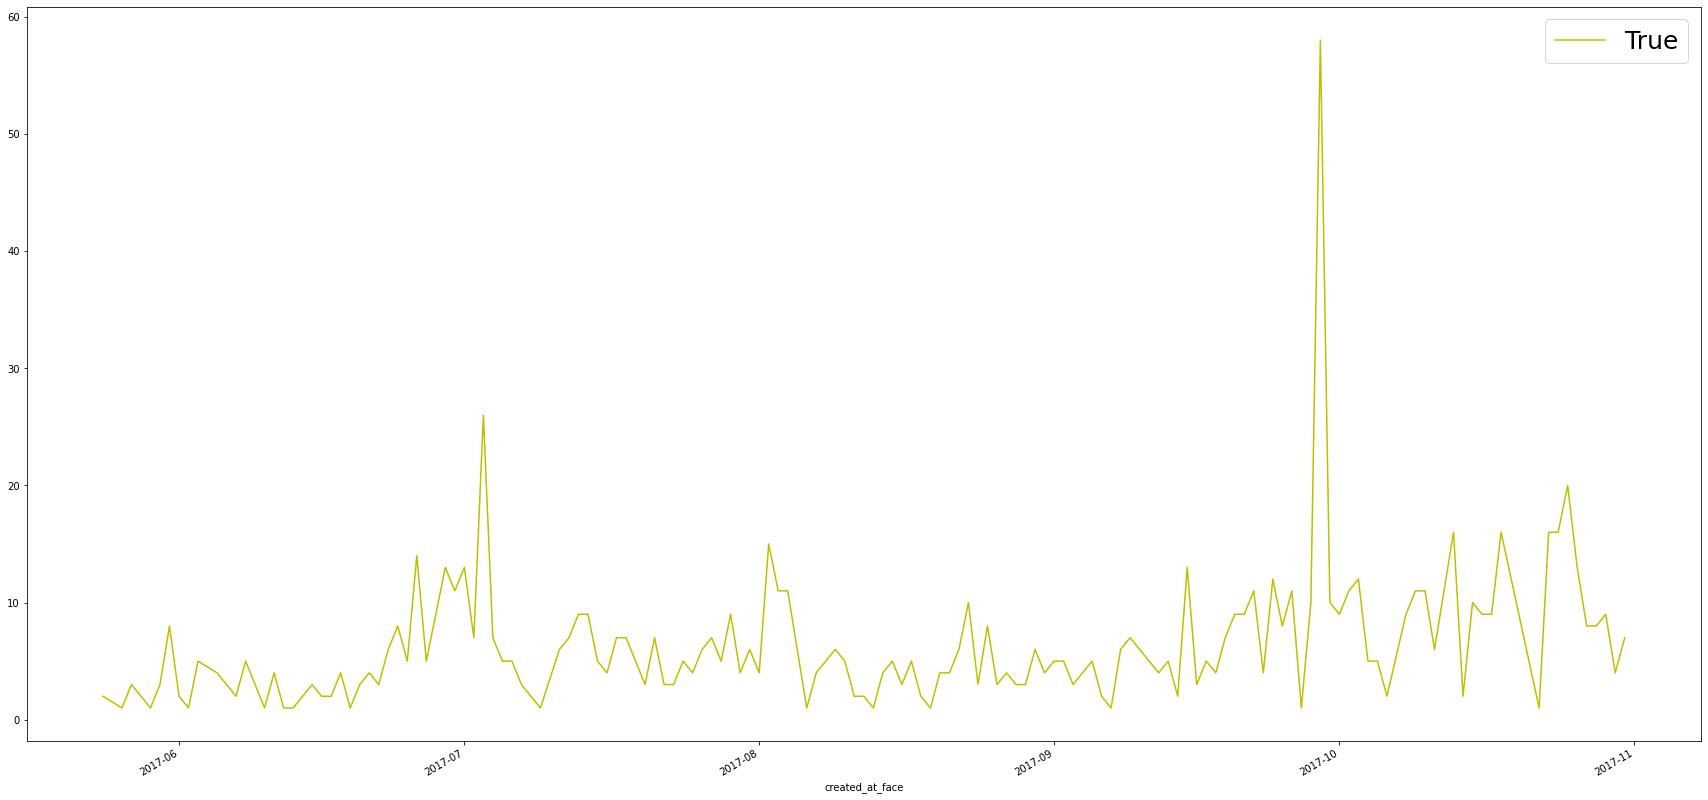

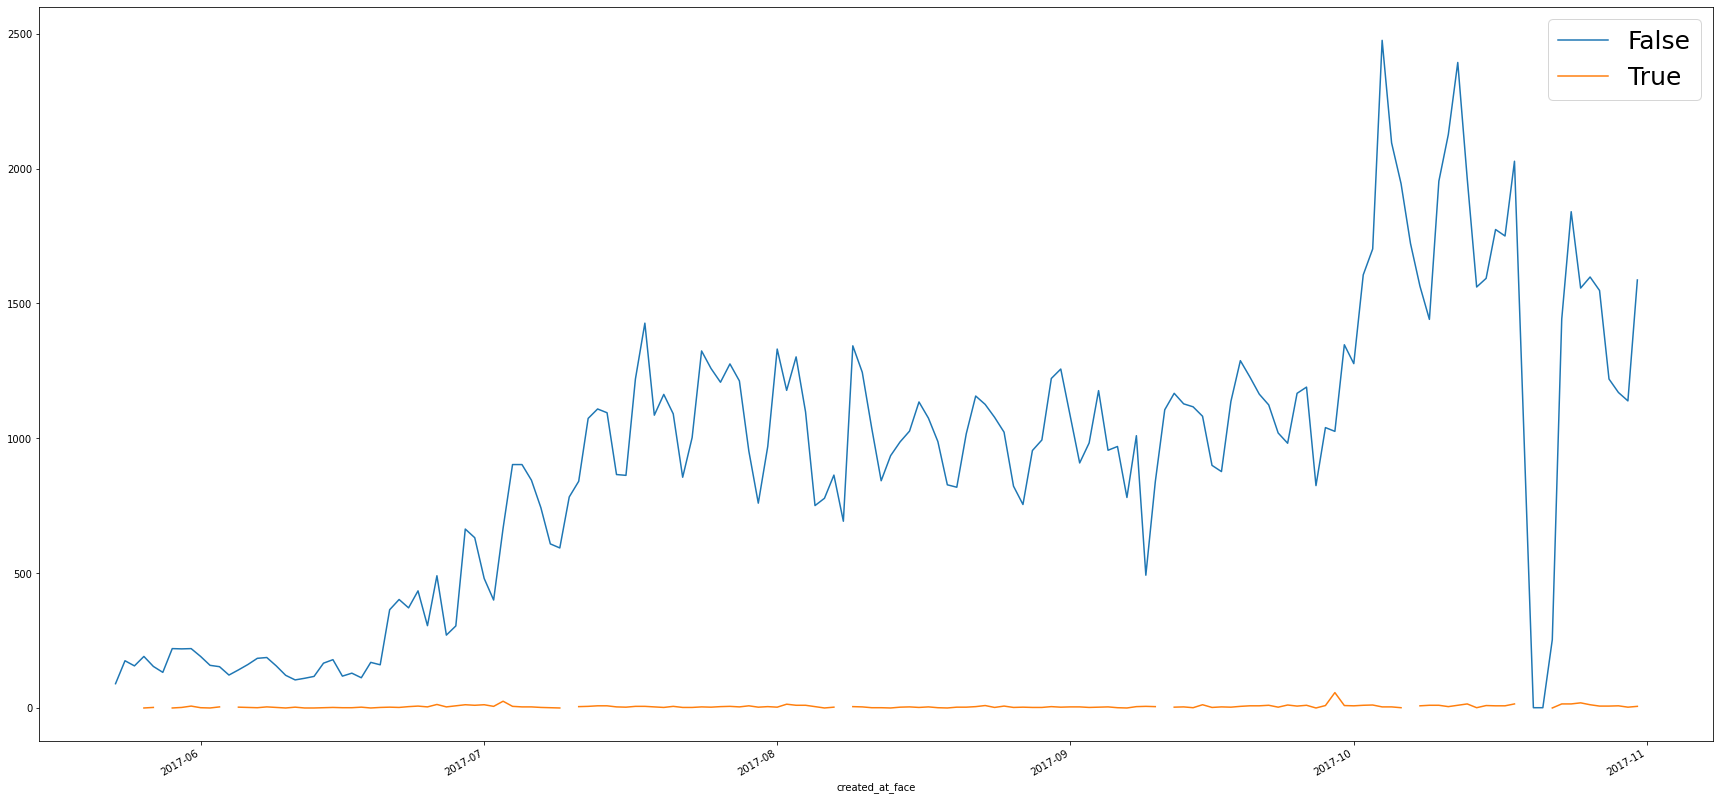

In [40]:
X=(df.groupby(pd.Grouper(key='created_at_face', freq='D'))['user_id_doc'].value_counts()>2)

X[X==True].groupby('created_at_face').count().plot(color='y', label = 'True')
plt.legend(loc='best',prop={'size': 25})

X.groupby('created_at_face').value_counts().unstack().plot()
plt.legend(loc='best',prop={'size': 25})
# The number of users with more than two attempts is relatively small and with a constant trend
# not reflecting any change on the pass outcome in this time period. 


In [44]:
# Keep the only or the first two attempts
df = df.groupby('user_id_doc', as_index=False).apply(lambda x: x if len(x)==1 else x.iloc[[0,1]]).reset_index(level=0, drop=True)

# Keep the only or second attempt
df1 = df.groupby('user_id_doc', as_index=False).apply(lambda x: x if len(x)==1 else x.iloc[[1]]).reset_index(level=0, drop=True)


In [45]:
# To confirm that there are no more than two attempts per user
(df['user_id_doc'].value_counts()>2).value_counts(), (df1['user_id_doc'].value_counts()>1).value_counts()


(False    142723
 Name: user_id_doc, dtype: int64, False    142723
 Name: user_id_doc, dtype: int64)

In [46]:
df.shape, df1.shape


((175073, 26), (142723, 26))

In [47]:
df.head()


,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,properties,sub_result,user_id_face,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,score,pass
47268,000017082a4548d4aa480781069cf24c,1,1.0,1.0,1.0,1.0,2017-08-17 21:03:54+00:00,1.0,1.0,1.0,...,"{'gender': 'Male', 'nationality': 'NZL', 'docu...",clear,000017082a4548d4aa480781069cf24c,1.0,1.0,2017-08-17 21:03:54+00:00,1.0,1.0,NaN,1.0
47278,000017082a4548d4aa480781069cf24c,0,NaN,0.0,NaN,0.0,2017-08-17 21:10:25+00:00,1.0,NaN,NaN,...,{},rejected,000017082a4548d4aa480781069cf24c,1.0,1.0,2017-08-17 21:10:25+00:00,1.0,NaN,NaN,0.0
54399,000052fe85524411a593a999c2a24462,1,1.0,1.0,1.0,1.0,2017-07-26 10:14:12+00:00,1.0,NaN,NaN,...,"{'gender': 'Female', 'nationality': 'NLD', 'do...",clear,000052fe85524411a593a999c2a24462,1.0,1.0,2017-07-26 10:14:12+00:00,1.0,1.0,NaN,1.0
77103,0000ae3e6cad4aa6b22a70c141cfebea,0,1.0,1.0,1.0,1.0,2017-10-04 12:50:16+00:00,1.0,1.0,1.0,...,"{'issuing_date': '2015-05-18', 'document_type'...",caution,0000ae3e6cad4aa6b22a70c141cfebea,1.0,1.0,2017-10-04 12:50:16+00:00,1.0,1.0,NaN,0.0
75750,0000ae3e6cad4aa6b22a70c141cfebea,0,1.0,0.0,1.0,1.0,2017-10-04 21:43:53+00:00,1.0,0.0,1.0,...,"{'gender': 'Female', 'nationality': 'IRL', 'do...",caution,0000ae3e6cad4aa6b22a70c141cfebea,1.0,1.0,2017-10-04 21:43:53+00:00,1.0,1.0,NaN,0.0


### 5. The Pass value and null values

#### 5.1 Null values

In [48]:
#Sort through date on "created_at_face"
df.sort_values(["created_at_face"], inplace=True)
df1.sort_values(["created_at_face"], inplace=True)


In [49]:
# Make a copy of df with the null values
df_nulls = df.copy()


In [50]:
# Fill the null values with 1, the same as 'clear' (because they have no effect on the 'pass' - check the last section)
df.fillna(1, inplace=True)


In [51]:
(df['created_at_face']==df_nulls['created_at_face']).value_counts()

True    175073
Name: created_at_face, dtype: int64

In [53]:
df1['user_id_doc'].equals(df1['user_id_face'])

True

In [54]:
df = df.drop(['user_id_face'], axis = 1)

In [55]:
df.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,compromised_document_result,properties,sub_result,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,score,pass
47692,3aee7324dfba466d96888ff9ad185b58,1,1.0,1.0,1.0,1.0,2017-05-23 15:13:02+00:00,1.0,1.0,1.0,...,1.0,"{'gender': 'Male', 'document_type': 'driving_l...",clear,1.0,1.0,2017-05-23 15:13:02+00:00,1.0,1.0,1.00,1.0
25636,206b6bd0cc114844b471fb750e1c9b8c,1,1.0,1.0,1.0,1.0,2017-05-23 15:18:05+00:00,1.0,1.0,1.0,...,1.0,"{'gender': 'Male', 'nationality': 'MLT', 'docu...",clear,0.0,1.0,2017-05-23 15:18:05+00:00,0.0,1.0,0.78,0.0
53960,8edd77f60f8e4a739f35cb797b292e6d,1,1.0,1.0,1.0,1.0,2017-05-23 15:22:16+00:00,1.0,1.0,1.0,...,1.0,"{'document_type': 'driving_licence', 'date_of_...",clear,0.0,1.0,2017-05-23 15:22:16+00:00,0.0,1.0,1.00,0.0
25637,636fb441d54446a8996e3ff79e09535f,0,1.0,1.0,1.0,1.0,2017-05-23 15:27:06+00:00,1.0,1.0,1.0,...,1.0,"{'gender': 'Female', 'nationality': 'PRT', 'do...",caution,1.0,1.0,2017-05-23 15:27:06+00:00,1.0,1.0,0.49,0.0
25638,fffa227d01064f9f9cef396d893863c1,1,1.0,1.0,1.0,1.0,2017-05-23 15:27:56+00:00,1.0,1.0,1.0,...,1.0,"{'gender': 'Male', 'document_type': 'driving_l...",clear,1.0,1.0,2017-05-23 15:27:56+00:00,1.0,1.0,0.72,1.0


#### 5.2 The pass per costumer attempt 

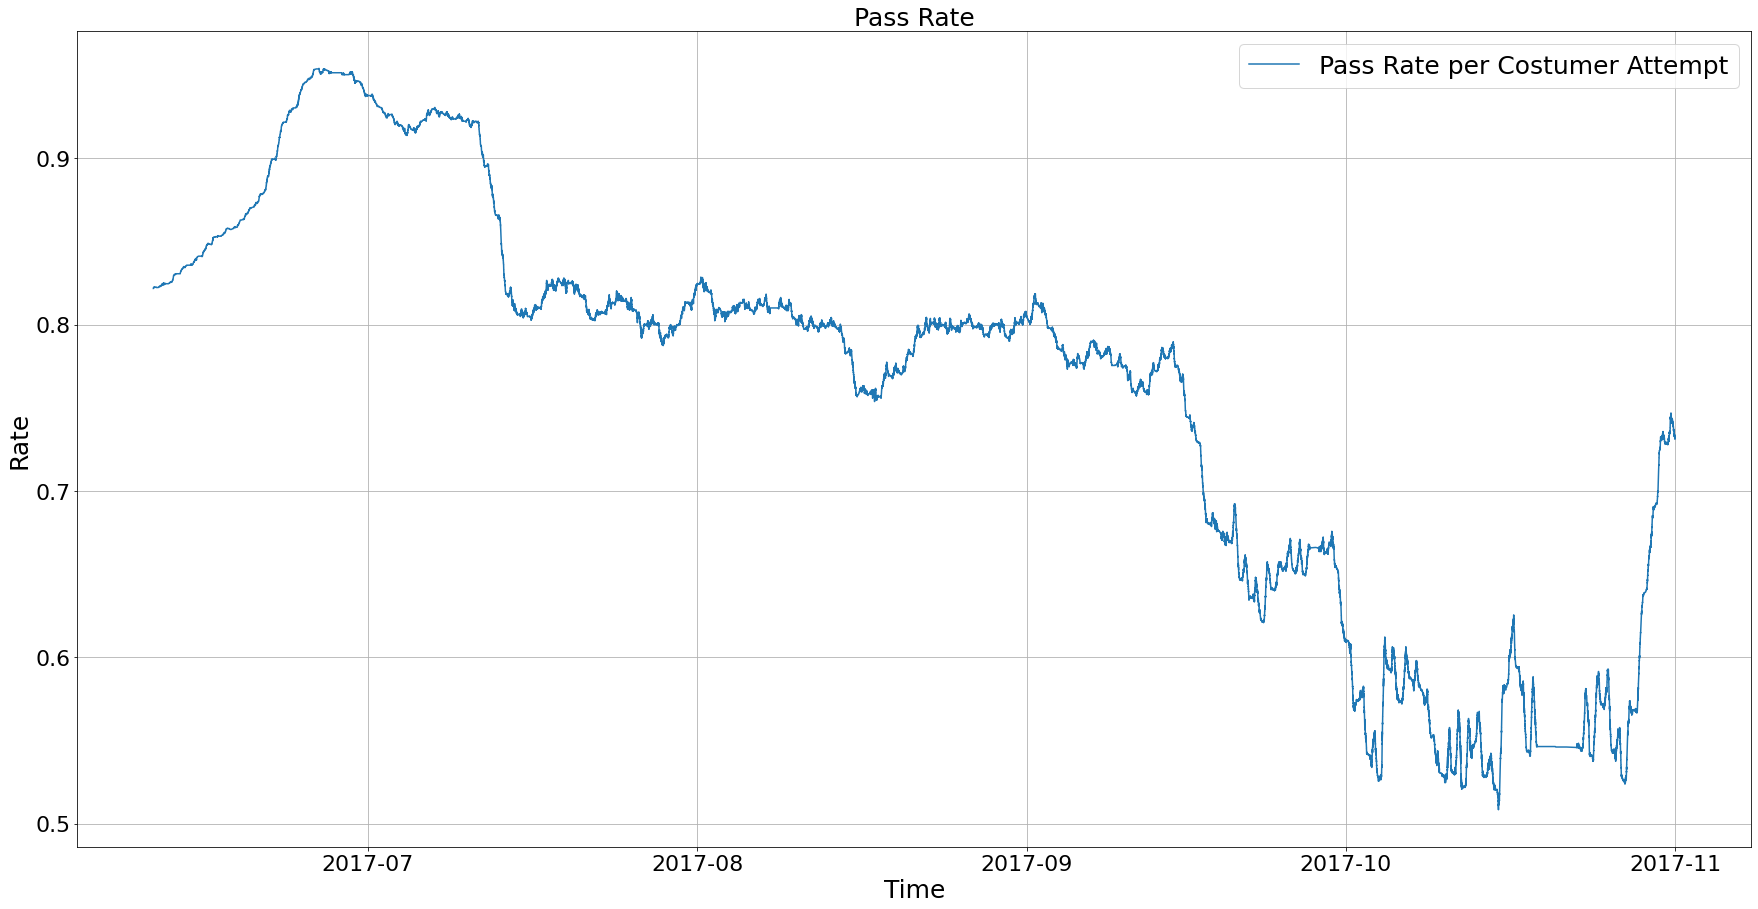

In [56]:
plot_pass_rate([df['pass']], ['Pass Rate per Costumer Attempt'], title='Pass Rate')
# We can observe that the 'pass rate' decreased into the end of the period.


<AxesSubplot:xlabel='created_at_face'>

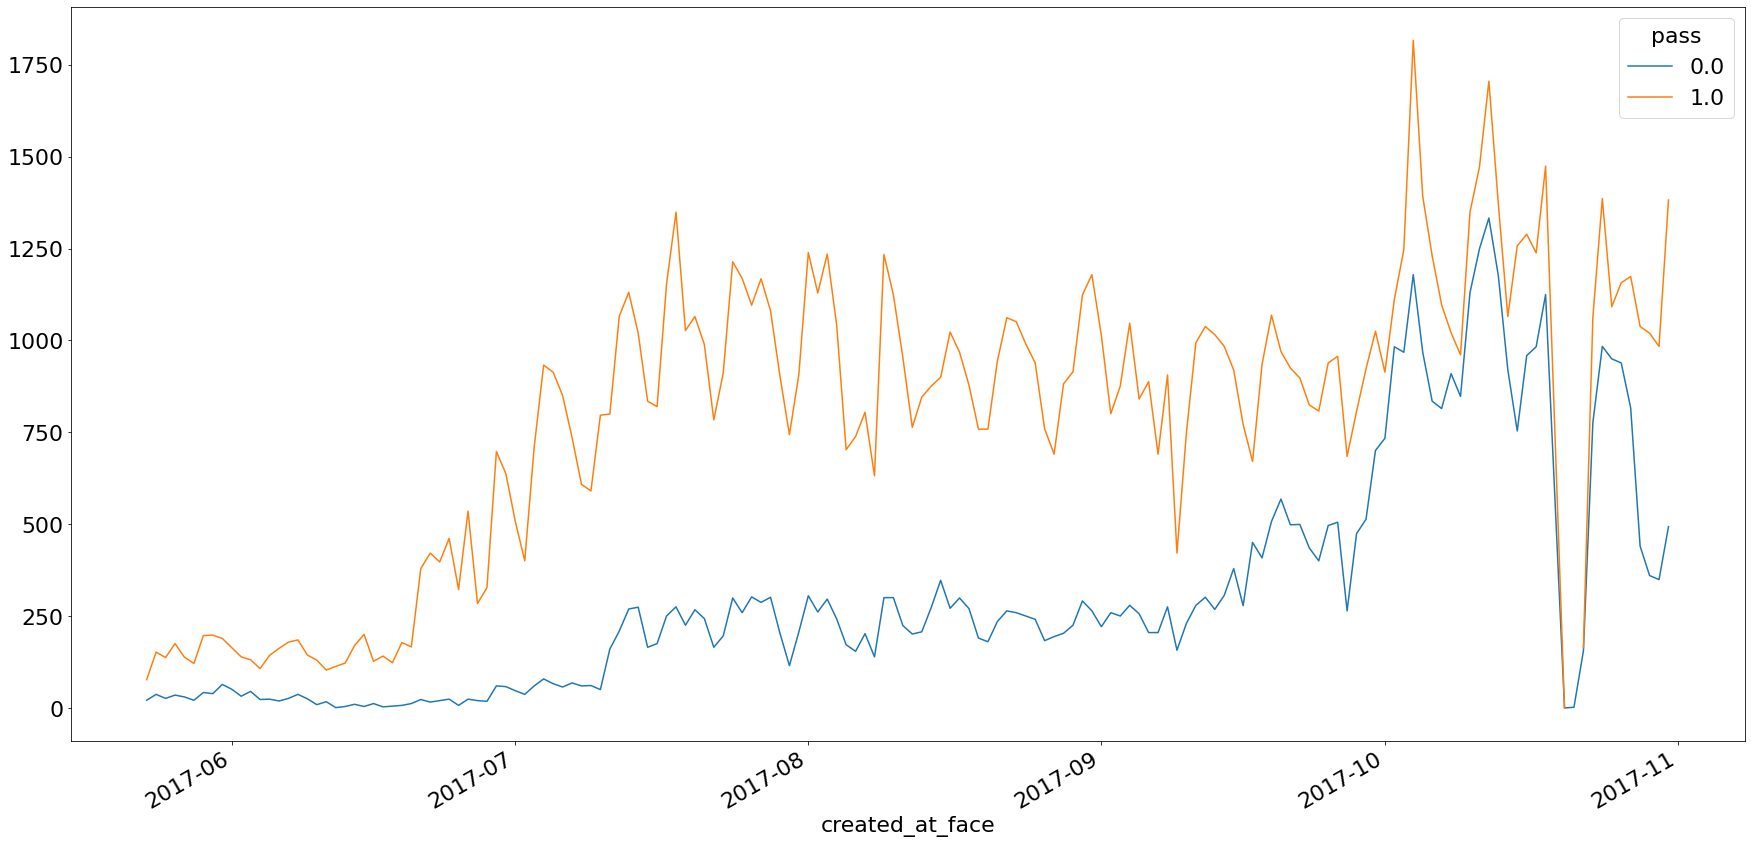

In [57]:
# The daily pass and fail ammounts
df.groupby(pd.Grouper(key='created_at_face', freq='D'))['pass'].value_counts().unstack().plot(kind='line', stacked=False)


#### 5.3 The pass per costumer 

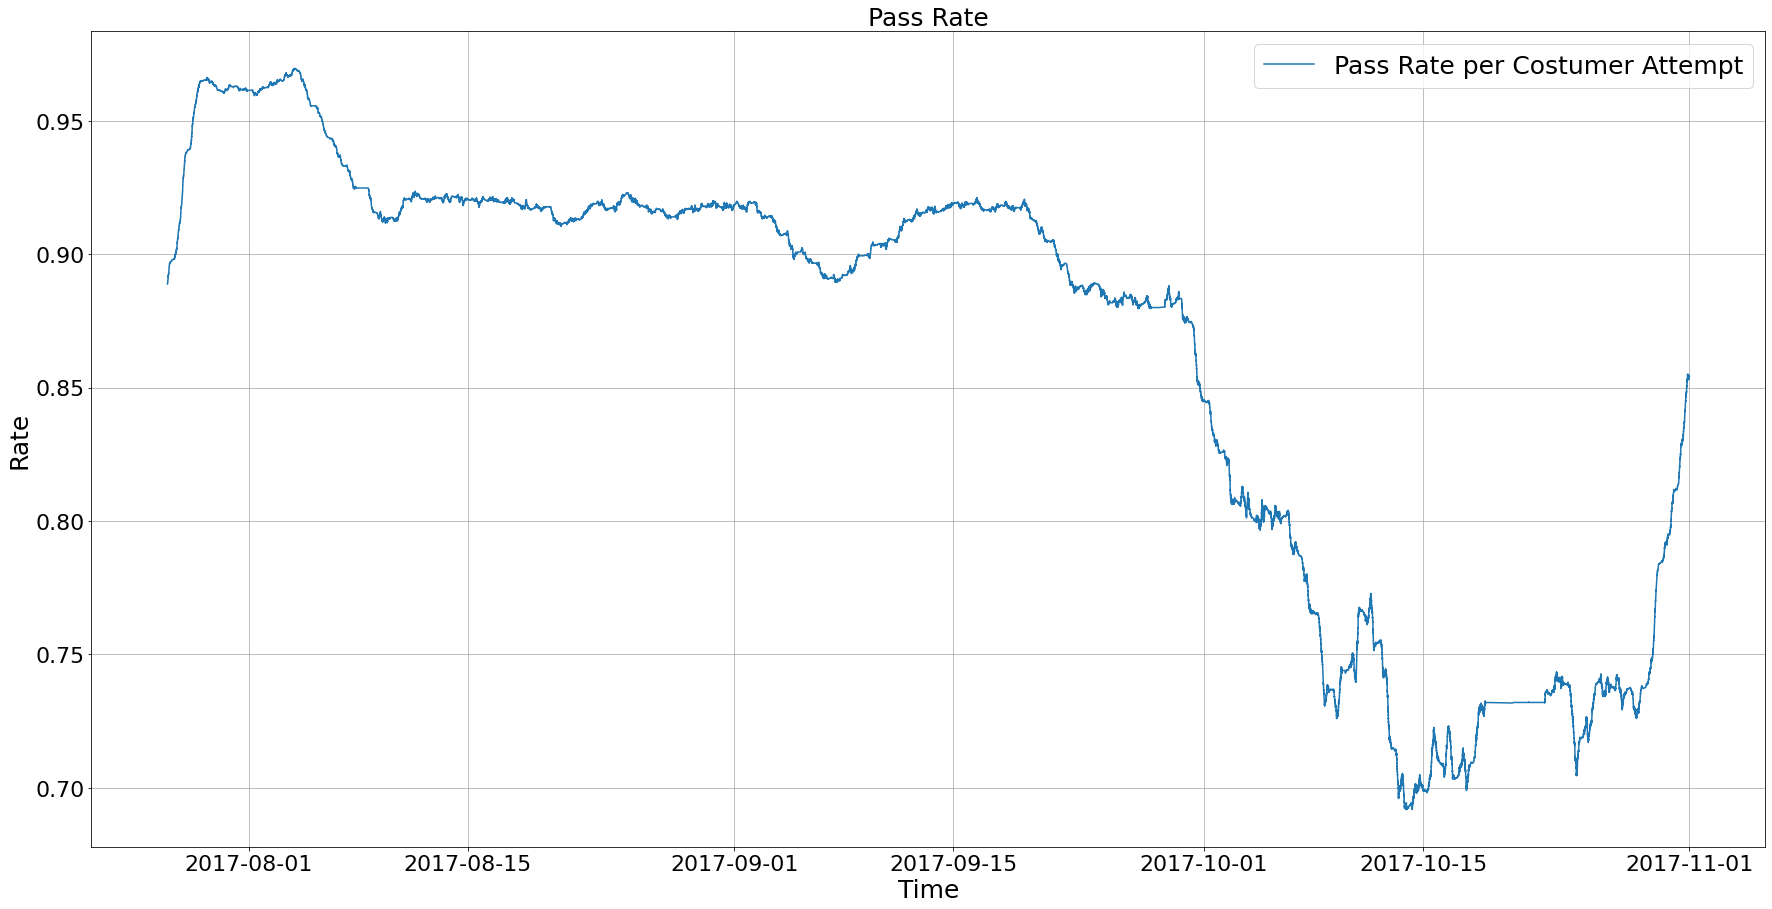

In [58]:
plot_pass_rate([df1['pass']], ['Pass Rate per Costumer Attempt'], title='Pass Rate', N=5000)
# We can observe that the 'pass rate' when considering only the last of two attempts per costumer doesn't fall as much.


#### 5.4 Pass rate per costumer attempt per day vs total attempts per day

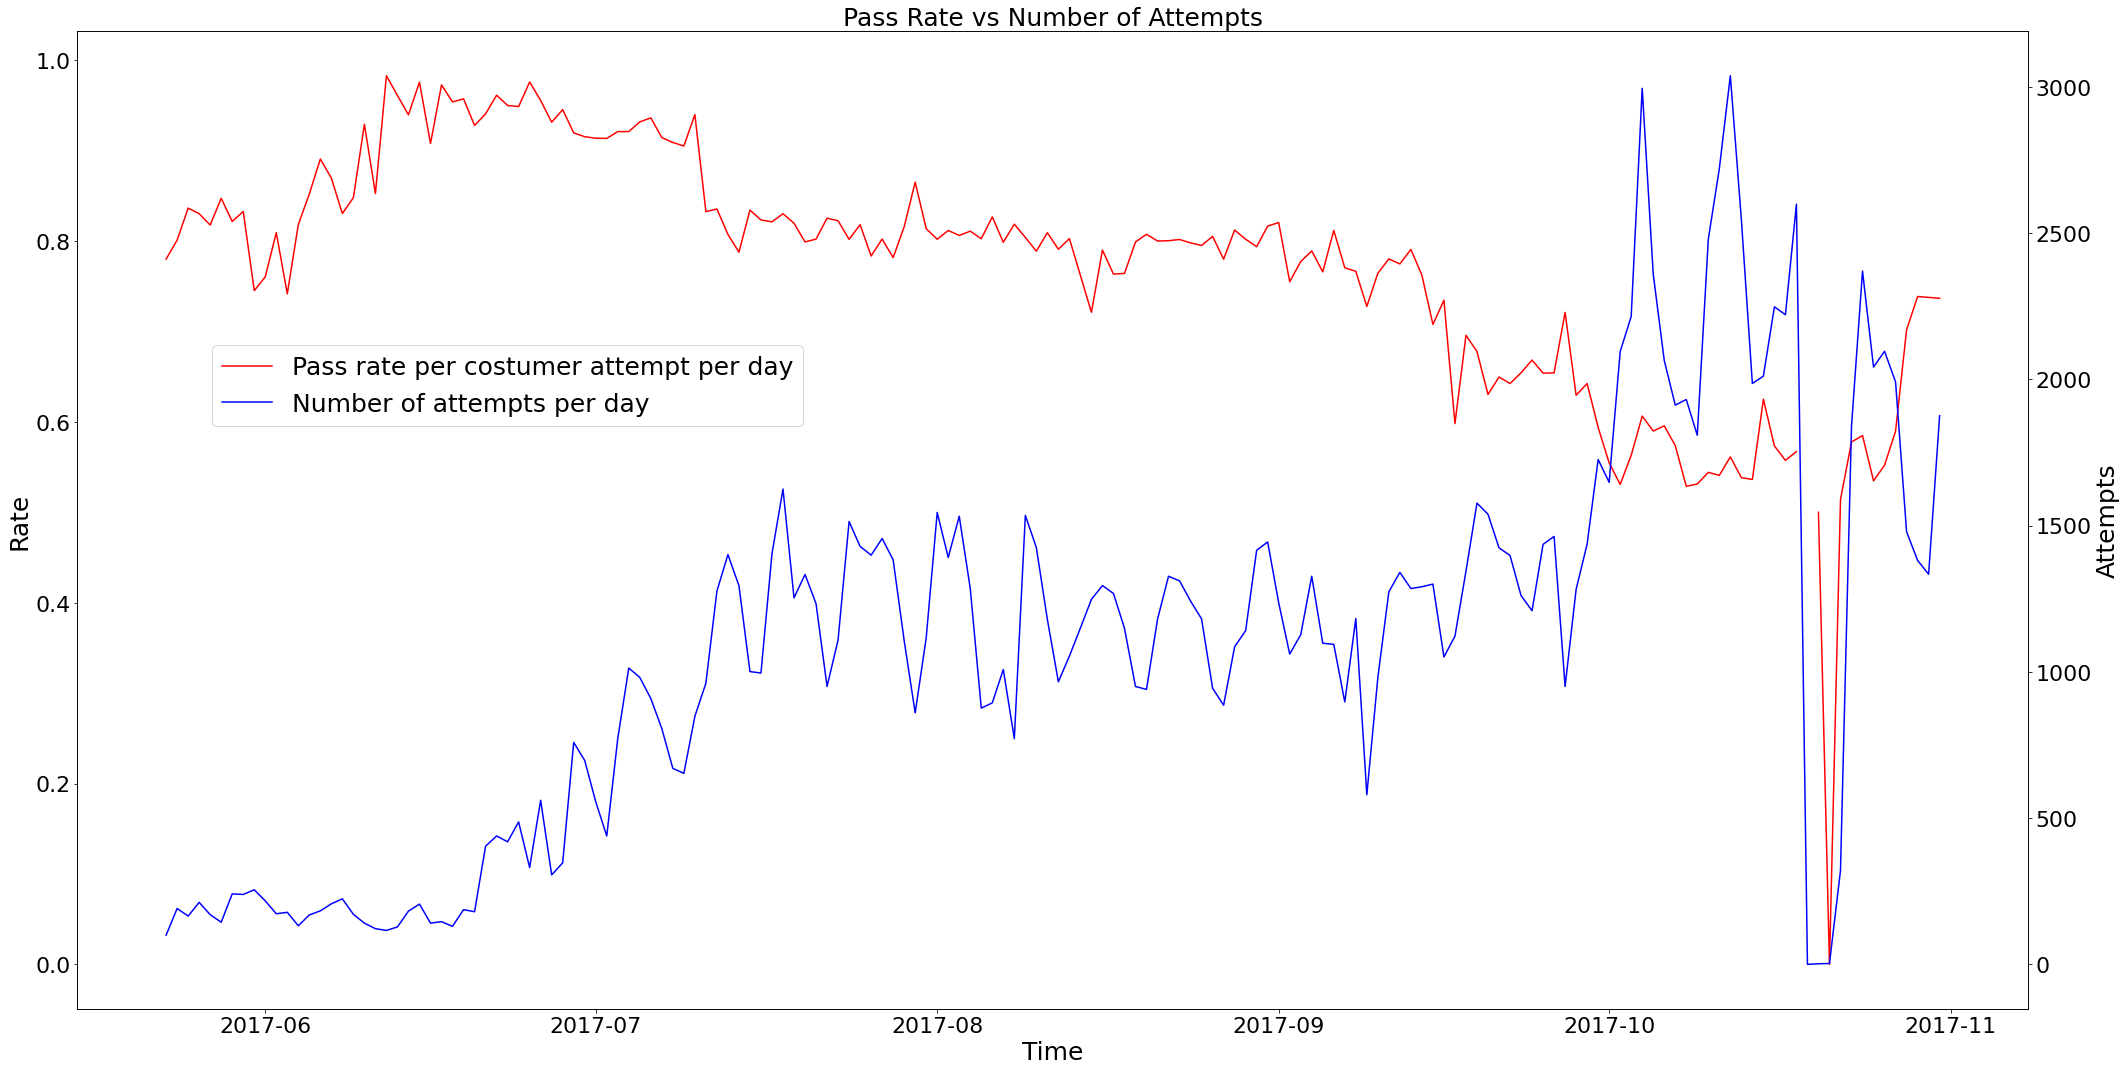

In [59]:
y1 = df.groupby(pd.Grouper(key='created_at_face', freq='D'))['pass'].mean()#.plot(kind='line', stacked=False)


y2 = df.groupby(pd.Grouper(key='created_at_face', freq='D'))['pass'].count()#.unstack().plot(kind='line', stacked=False)


plot_dif_scale(y1, y2, 'Pass rate per costumer attempt per day', 'Number of attempts per day', 'Pass Rate vs Number of Attempts')

In [60]:
y1.fillna(0, inplace=True) #fill null value of y1 with 0 because on the corresponding date there were no attempts
y1.isna().value_counts()

False    162
Name: pass, dtype: int64

In [61]:
# correlation coefficient of 'Pass rate per costumer attempt per day' and 'Number of attempts per day'.
np.corrcoef(y1, y2)

array([[ 1.        , -0.47877913],
       [-0.47877913,  1.        ]])

In [62]:
y2[['2017-10-18 00:00:00+00:00', '2017-10-19 00:00:00+00:00', '2017-10-20 00:00:00+00:00', '2017-10-21 00:00:00+00:00', '2017-10-22 00:00:00+00:00']]
#The possible total system failure days days

created_at_face
2017-10-18 00:00:00+00:00    2599
2017-10-19 00:00:00+00:00       0
2017-10-20 00:00:00+00:00       2
2017-10-21 00:00:00+00:00       3
2017-10-22 00:00:00+00:00     321
Name: pass, dtype: int64

### 6. Correlations in the dataframe columns

In [63]:
data_corr  = df.corr(method='pearson')
#data_corr = data_corr.apply(lambda x: [y if y >= 0.3 else np.nan for y in x])

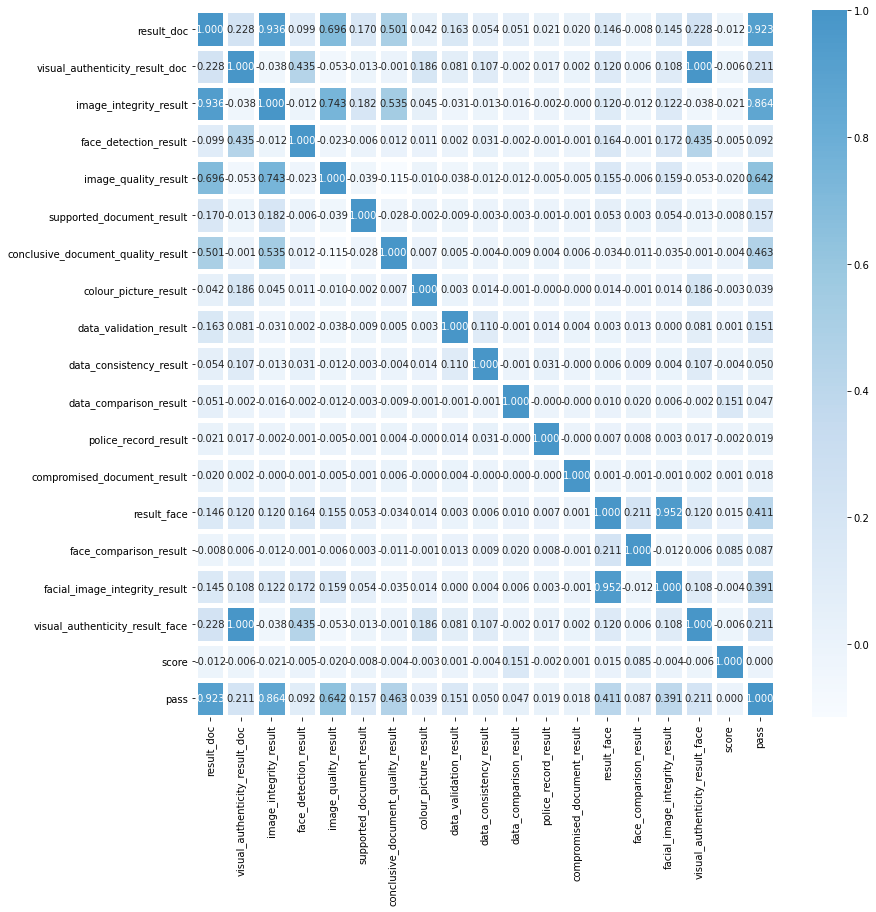

In [64]:
plt.rcParams.update({'font.size': 10})

f, ax = plt.subplots(figsize =(13,13))
sns.heatmap(data_corr, annot = True, linewidths = 5, fmt = '.3f', ax = ax, cmap='Blues', center=0.8)
plt.show()

### 7. Comparing the 'pass' column with features with which has high correlation.

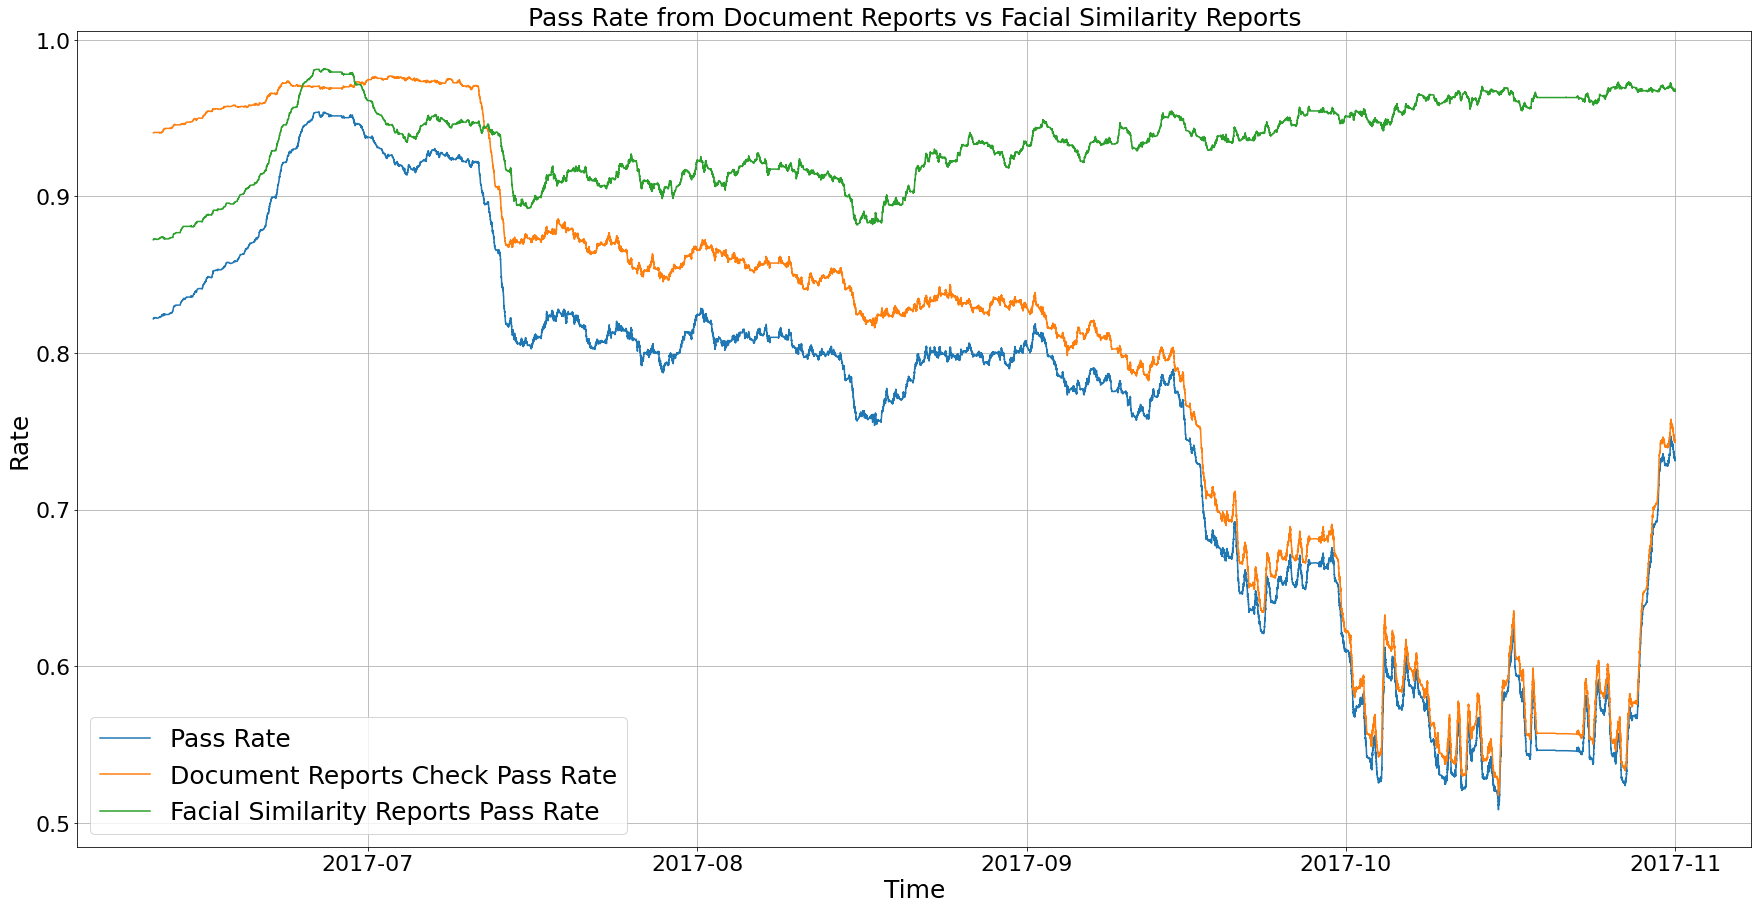

In [65]:
# Pass Rate from Document Reports vs Facial Similarity Reports
plot_pass_rate([df['pass'], df['result_doc'], df['result_face']], ['Pass Rate','Document Reports Check Pass Rate', 'Facial Similarity Reports Pass Rate'], 'Pass Rate from Document Reports vs Facial Similarity Reports')

In [66]:
# Columns with highest correlation with 'pass'
variable_columns = [df['pass'], df['result_doc'], df['result_face'],  df['image_integrity_result'], df['image_quality_result'], df['conclusive_document_quality_result'], df['facial_image_integrity_result'], df['colour_picture_result']]
labels = ['Pass Rate','Document Check Pass Rate', 'Facial Similarity Pass Rate', 'Image Integrity Pass Rate', 'Image Quality Pass Rate', 'Conclusive Document Quality Pass Rate', 'Facial Image Integrity Pass Rate', 'Color Picture Result']

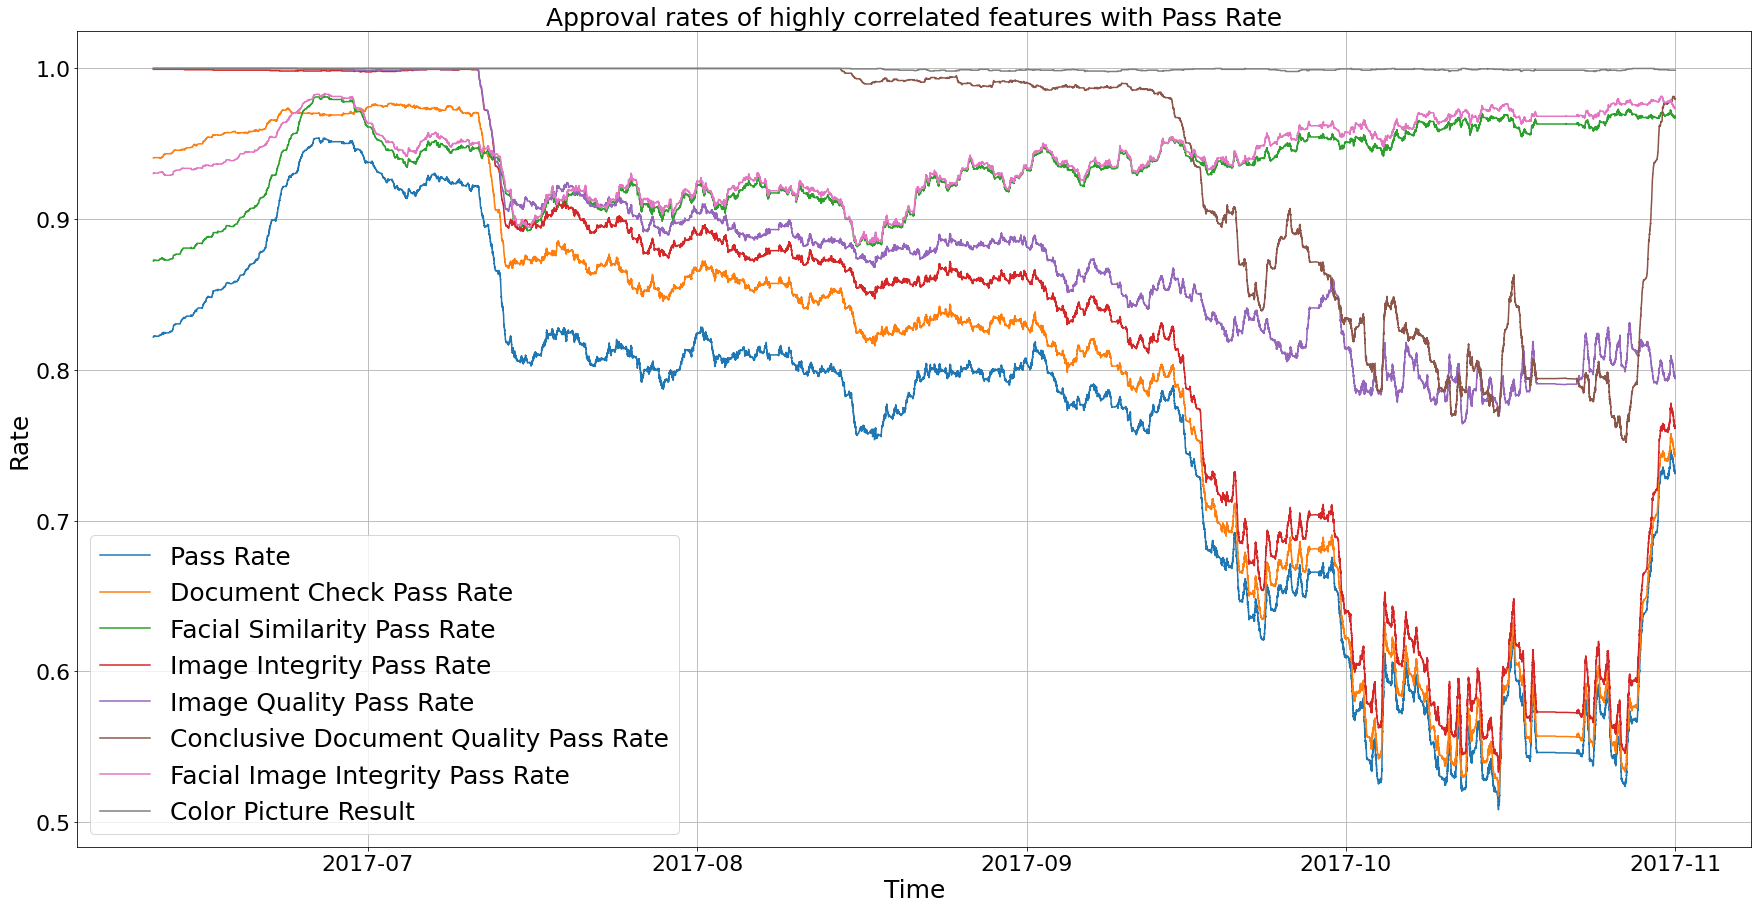

In [67]:
plot_pass_rate(variable_columns, labels, 'Approval rates of highly correlated features with Pass Rate')

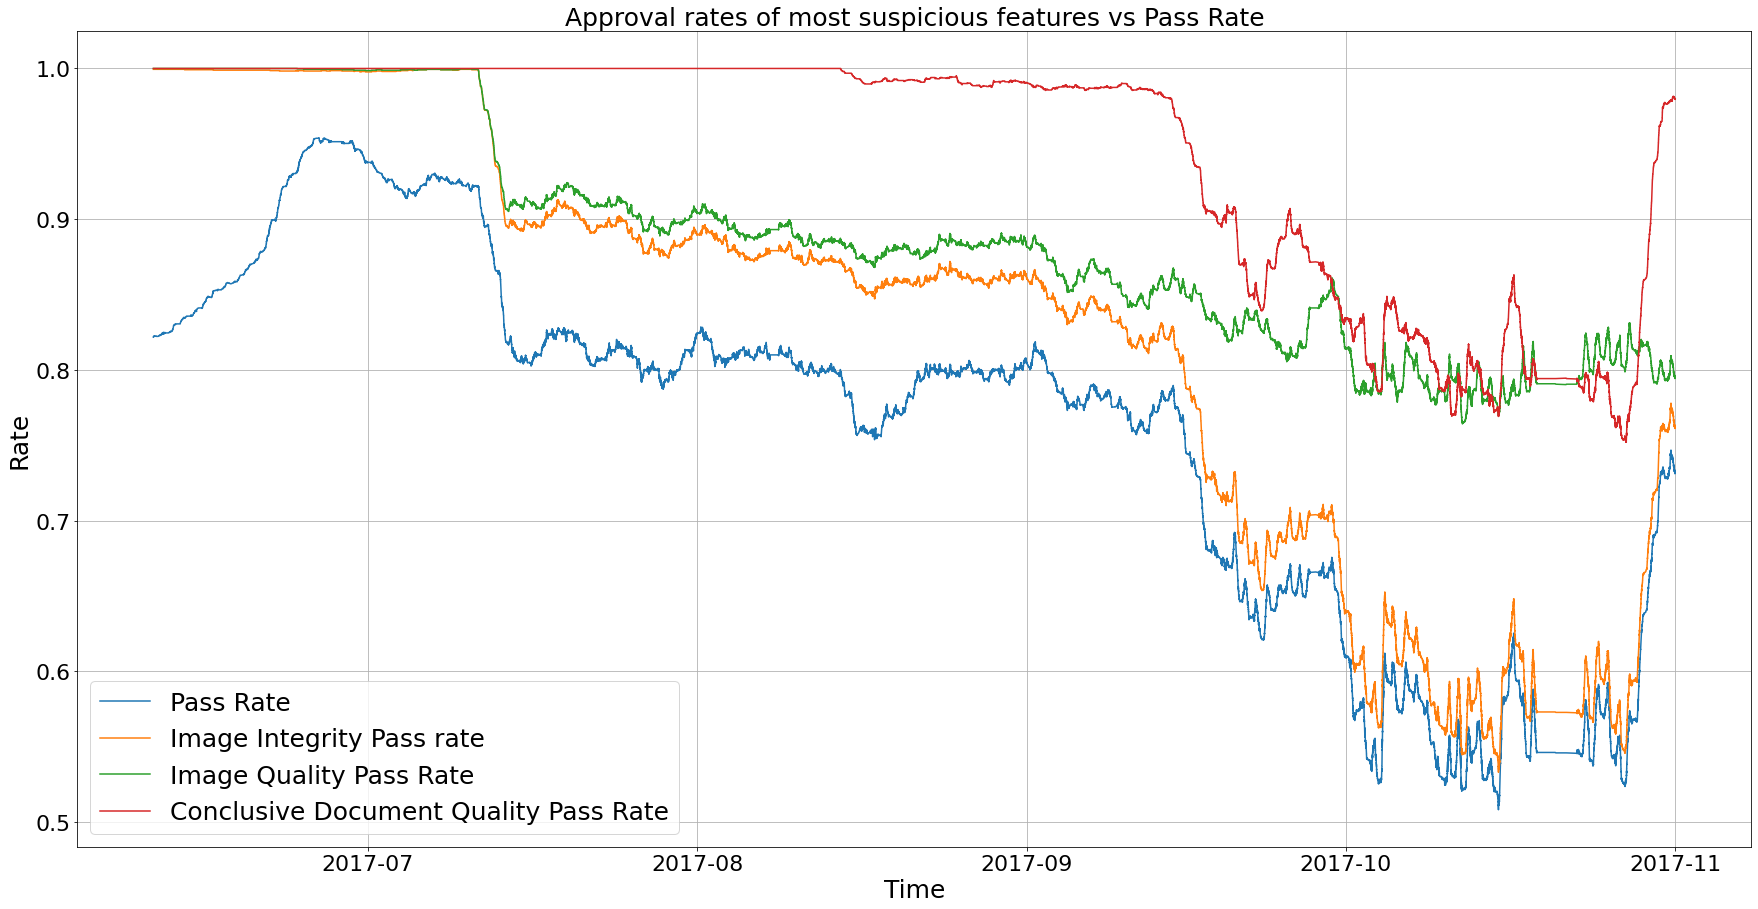

In [68]:
# The features that closely follow 'pass rate' are:
suspicious_features = [df['pass'], df['image_integrity_result'], df['image_quality_result'], df['conclusive_document_quality_result']]
labels = ['Pass Rate', 'Image Integrity Pass rate', 'Image Quality Pass Rate', 'Conclusive Document Quality Pass Rate']
# all of these features come from the Document Check Report
plot_pass_rate(suspicious_features, labels, 'Approval rates of most suspicious features vs Pass Rate')

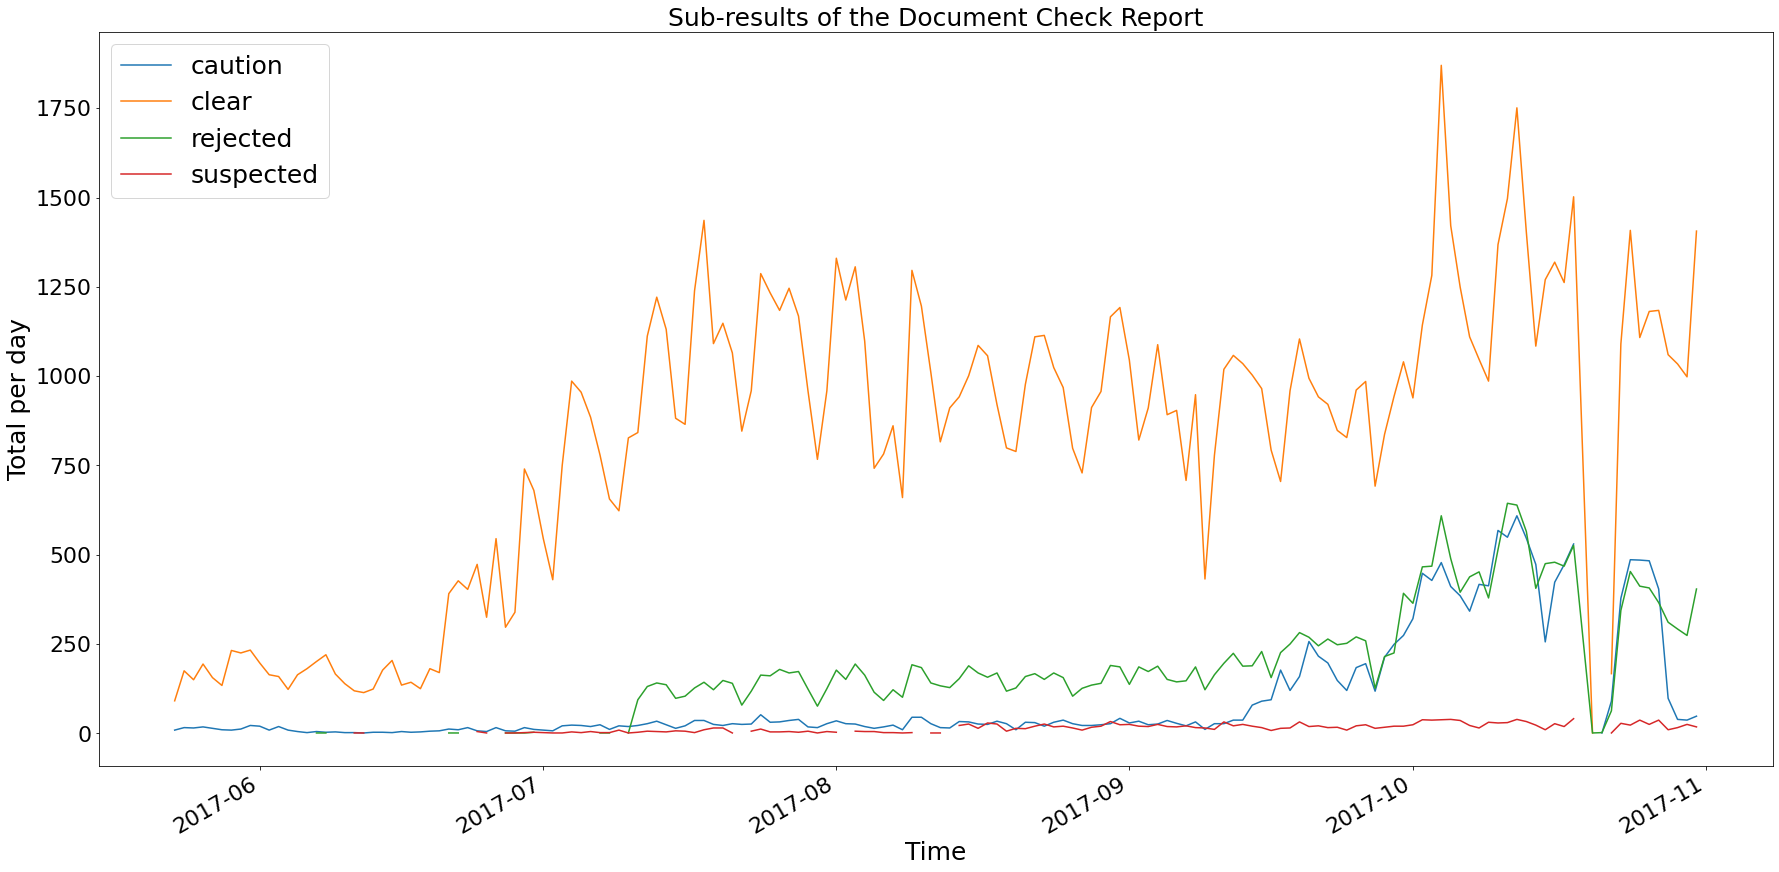

In [70]:
# Breakdown the 'sub_results' of Document Check
df.groupby(pd.Grouper(key='created_at_face', freq='D'))['sub_result'].value_counts().unstack().plot(kind='line', stacked=False)
#[(df['pass'] == 0)]


plt.ylabel("Total per day",fontsize=25)
plt.xlabel("Time",fontsize=25)
plt.title('Sub-results of the Document Check Report', size=25)
plt.legend(loc='best',prop={'size': 25})

### 8. Analyse Properties from the Document Check column

In [71]:
# Convert to python Dictionary
df['properties'] = df['properties'].apply(lambda element: ast.literal_eval(element))
df_nulls['properties'] = df_nulls['properties'].apply(lambda element: ast.literal_eval(element))

In [72]:
df = df.join(pd.json_normalize(df['properties'])) #to normalize the column properties_doc
df_nulls = df_nulls.join(pd.json_normalize(df['properties'])) #to normalize the column properties_doc

In [73]:
df.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,score,pass,gender,document_type,date_of_expiry,issuing_country,nationality,issuing_date,issuing_state,document_version
47692,3aee7324dfba466d96888ff9ad185b58,1,1.0,1.0,1.0,1.0,2017-05-23 15:13:02+00:00,1.0,1.0,1.0,...,1.00,1.0,Male,passport,2018-09-12,IRL,IRL,NaN,NaN,NaN
25636,206b6bd0cc114844b471fb750e1c9b8c,1,1.0,1.0,1.0,1.0,2017-05-23 15:18:05+00:00,1.0,1.0,1.0,...,0.78,0.0,Female,passport,2026-08-20,GBR,GBR,NaN,NaN,NaN
53960,8edd77f60f8e4a739f35cb797b292e6d,1,1.0,1.0,1.0,1.0,2017-05-23 15:22:16+00:00,1.0,1.0,1.0,...,1.00,0.0,Female,passport,2025-02-09,IRL,IRL,NaN,NaN,NaN
25637,636fb441d54446a8996e3ff79e09535f,0,1.0,1.0,1.0,1.0,2017-05-23 15:27:06+00:00,1.0,1.0,1.0,...,0.49,0.0,Male,national_identity_card,NaN,FRA,NaN,2008-06,NaN,NaN
25638,fffa227d01064f9f9cef396d893863c1,1,1.0,1.0,1.0,1.0,2017-05-23 15:27:56+00:00,1.0,1.0,1.0,...,0.72,1.0,Male,passport,2023-09-23,IRL,IRL,NaN,NaN,NaN


In [74]:
# Check most common values of document_type
df['document_type'].value_counts()

national_identity_card    53892
driving_licence           49787
passport                  41527
residence_permit           2863
work_permit                  17
voter_id                     11
tax_id                        7
birth_certificate             1
Name: document_type, dtype: int64

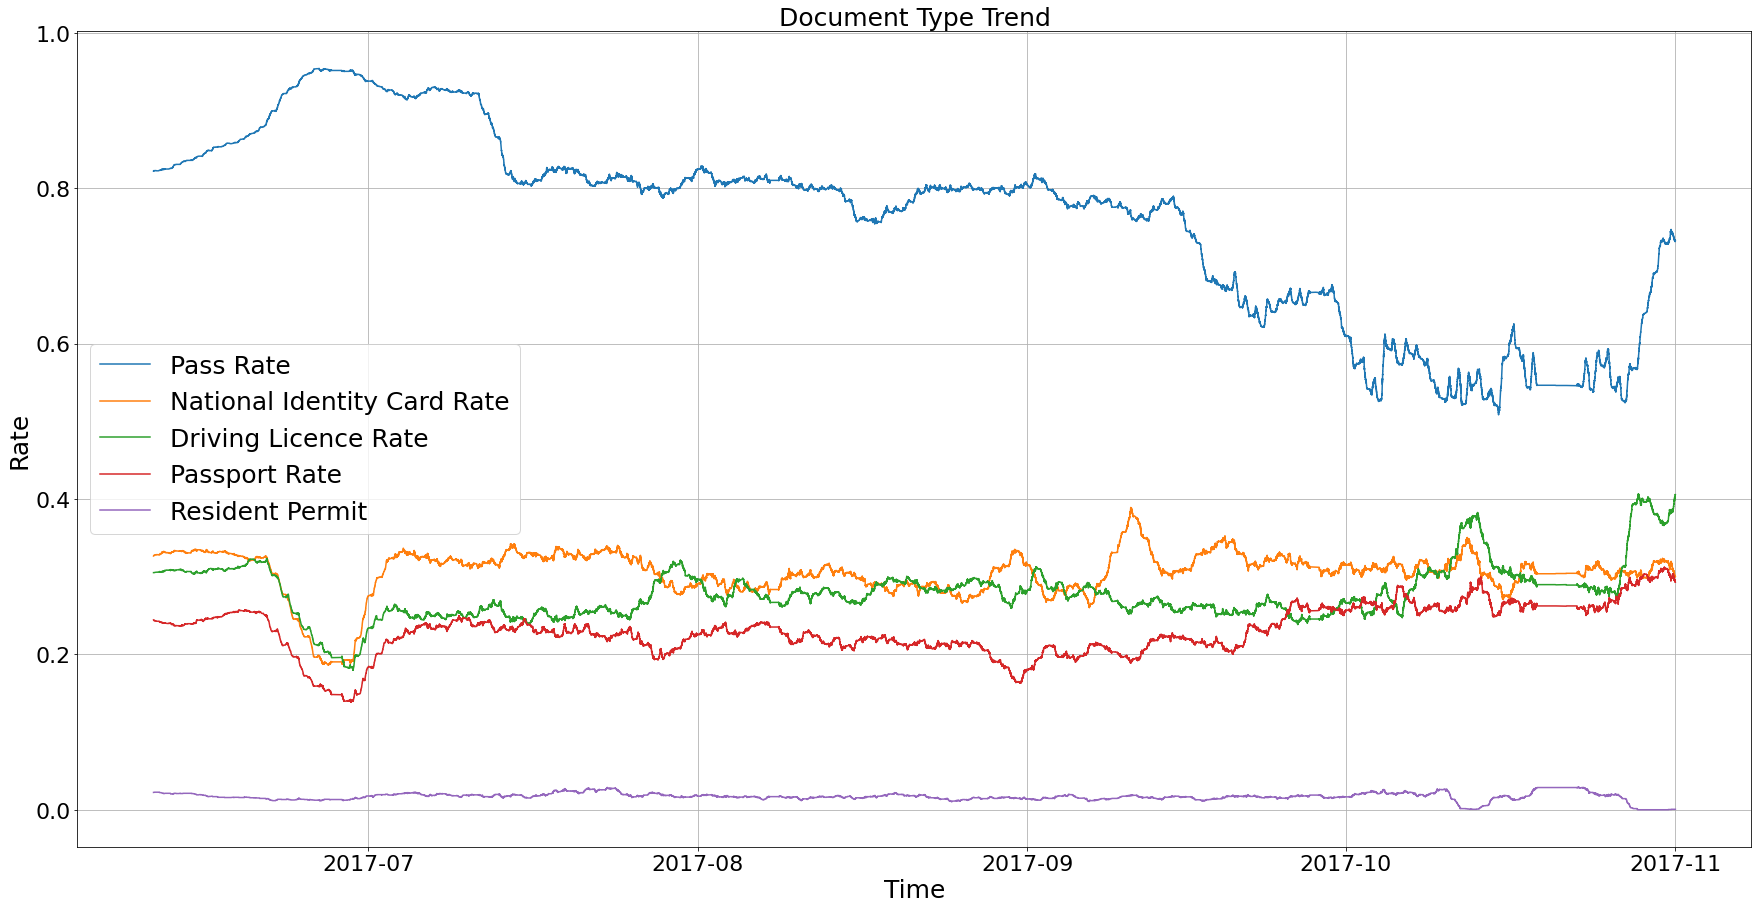

In [75]:
# Comparate the rates of the different document types and the 'pass rate'.
doc_type = pd.DataFrame()
doc_type['national_identity_card'] = (df['document_type'] == 'national_identity_card').astype(int)
doc_type['driving_licence'] = (df['document_type'] == 'driving_licence').astype(int)
doc_type['passport'] = (df['document_type'] == 'passport').astype(int)
doc_type['residence_permit'] = (df['document_type'] == 'residence_permit').astype(int)


plot_pass_rate([df['pass'], doc_type['national_identity_card'], doc_type['driving_licence'], doc_type['passport'], doc_type['residence_permit']], ['Pass Rate', 'National Identity Card Rate','Driving Licence Rate','Passport Rate', 'Resident Permit'],'Document Type Trend')
# There is no clear connection between the different document types and the 'pass rate' decrease.

In [76]:
#Check most common issuing countries
df['issuing_country'].value_counts().head(20)

GBR    39081
FRA    23196
LTU    12805
ESP     9344
IRL     9109
POL     9007
PRT     5433
ITA     4683
DEU     4323
GRC     3304
CHE     2839
NLD     2413
ROU     1972
BEL     1563
HUN     1353
CZE     1257
LVA     1232
SVN      926
BGR      886
GIB      824
Name: issuing_country, dtype: int64

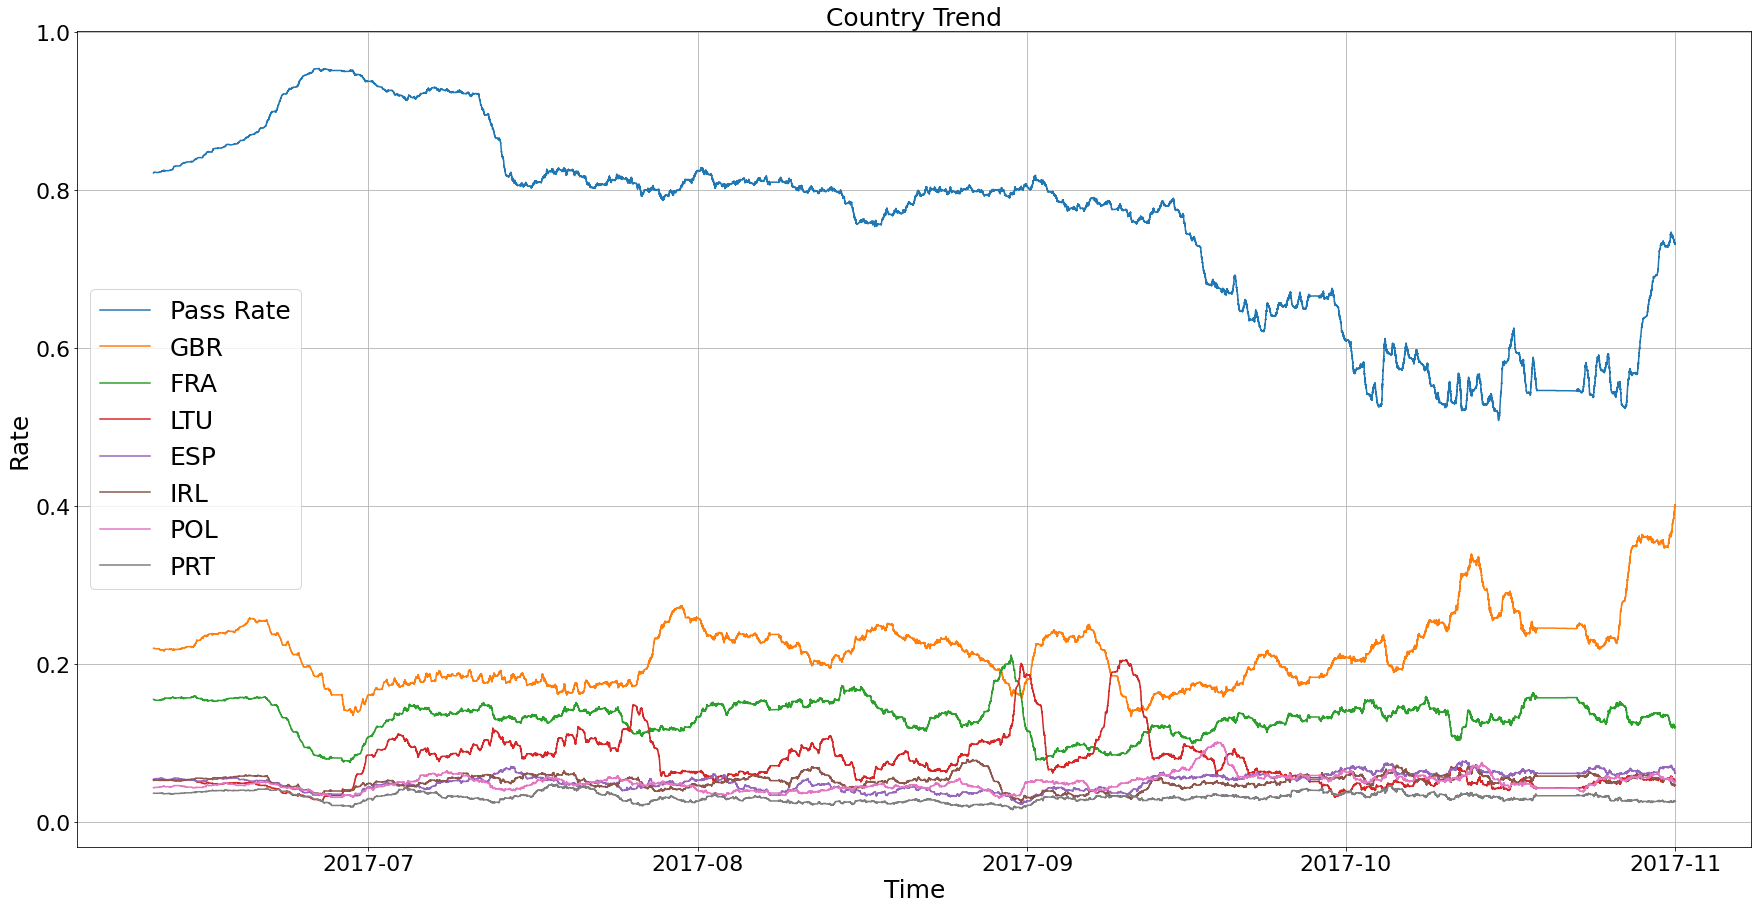

In [77]:
#Compare the issuing countries rates with the 'pass rate'

gbr = df['issuing_country'] == 'GBR'
fra = df['issuing_country'] == 'FRA'
ltu = df['issuing_country'] == 'LTU'
esp = df['issuing_country'] == 'ESP'
irl = df['issuing_country'] == 'IRL'
pol = df['issuing_country'] == 'POL'
prt = df['issuing_country'] == 'PRT'



plot_pass_rate([df['pass'], gbr, fra, ltu, esp, irl, pol, prt], ['Pass Rate', 'GBR','FRA','LTU', 'ESP', 'IRL', 'POL', 'PRT'],'Country Trend')
#There is clear relation between each most common issuing countries rates and the 'pass rate'

In [78]:
df['document_version'].value_counts().head(20)
# No information in this column

10000    41
20000    21
Name: document_version, dtype: int64

In [79]:
#The 'score' column from 'properties' of the 'Facial Similarity Report'
df['score'].fillna(0, inplace=True)
df['score'].value_counts()
# Apart from the null values, no information in this column

1.00    171668
0.69       165
0.64       160
0.66       157
0.63       154
         ...  
0.15         1
0.12         1
0.14         1
0.25         1
0.11         1
Name: score, Length: 80, dtype: int64

### 9. Null values

In [80]:
def plot_null_rate(variables,labels,start=0,N=5000):

    for result in range(len(variables)):
        if result > 0:
            variables[result] = df_nulls[variables[result]].isnull()
    plot_pass_rate(variables,labels,start,N)

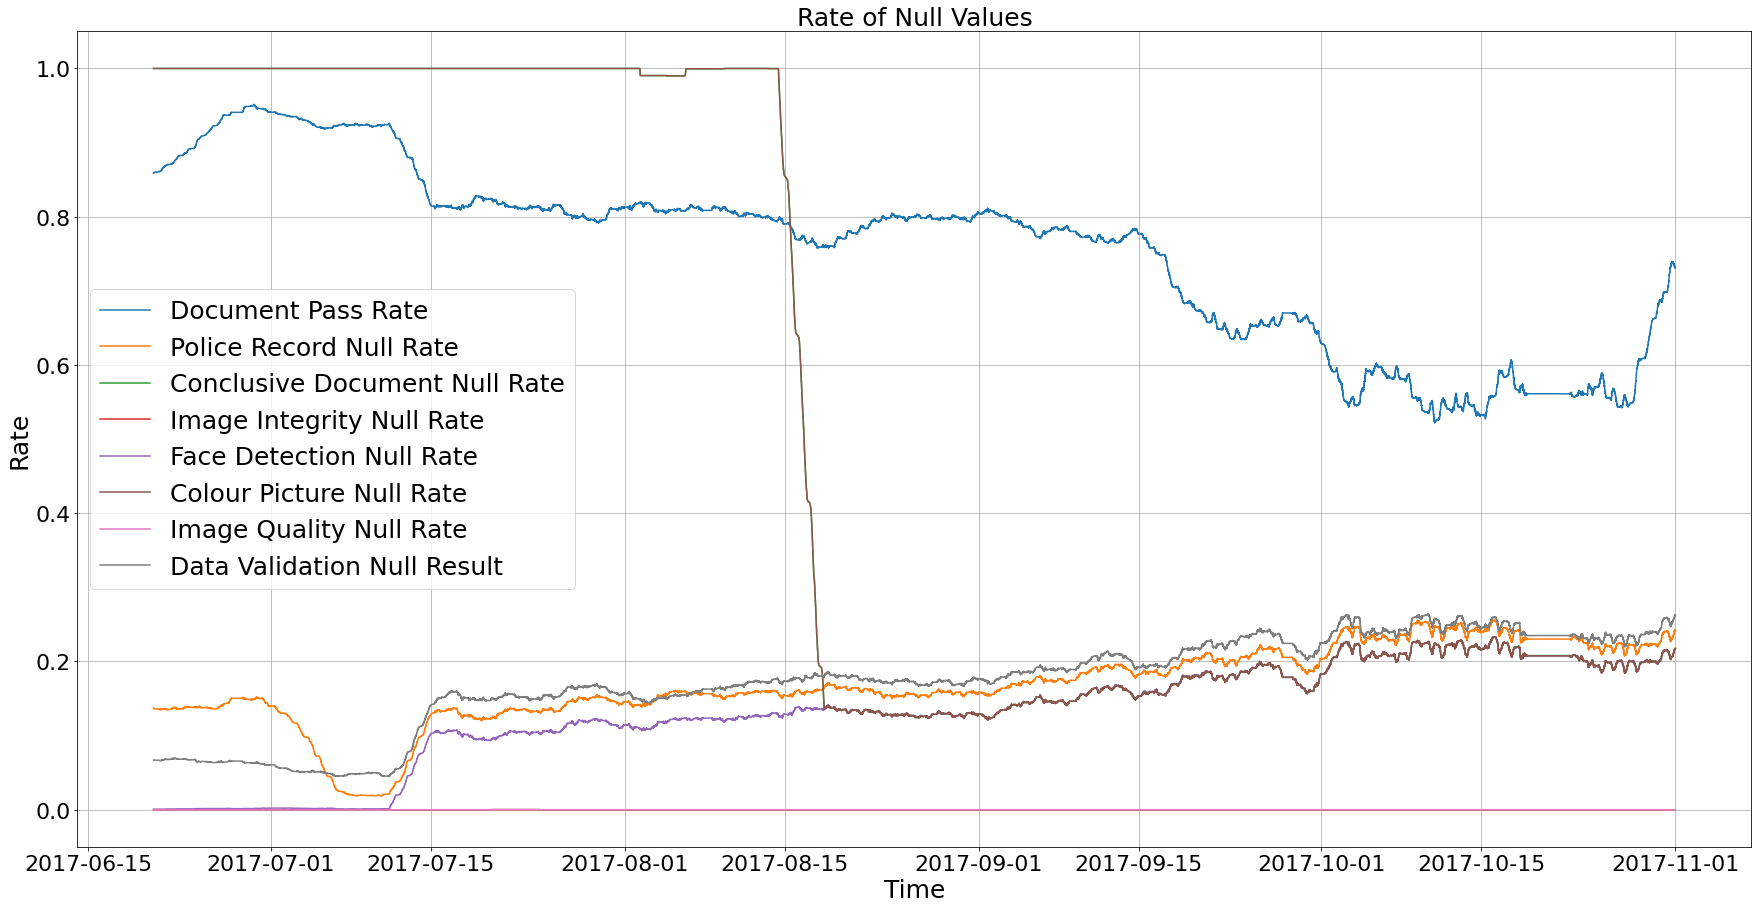

In [81]:

W = [df['pass'], 'police_record_result', 'conclusive_document_quality_result', 'image_integrity_result',  'face_detection_result', 'colour_picture_result', 'image_quality_result', 'data_validation_result']


plot_null_rate(W,['Document Pass Rate', 'Police Record Null Rate', 'Conclusive Document Null Rate','Image Integrity Null Rate', 'Face Detection Null Rate','Colour Picture Null Rate','Image Quality Null Rate','Data Validation Null Result'],'Rate of Null Values',5000)

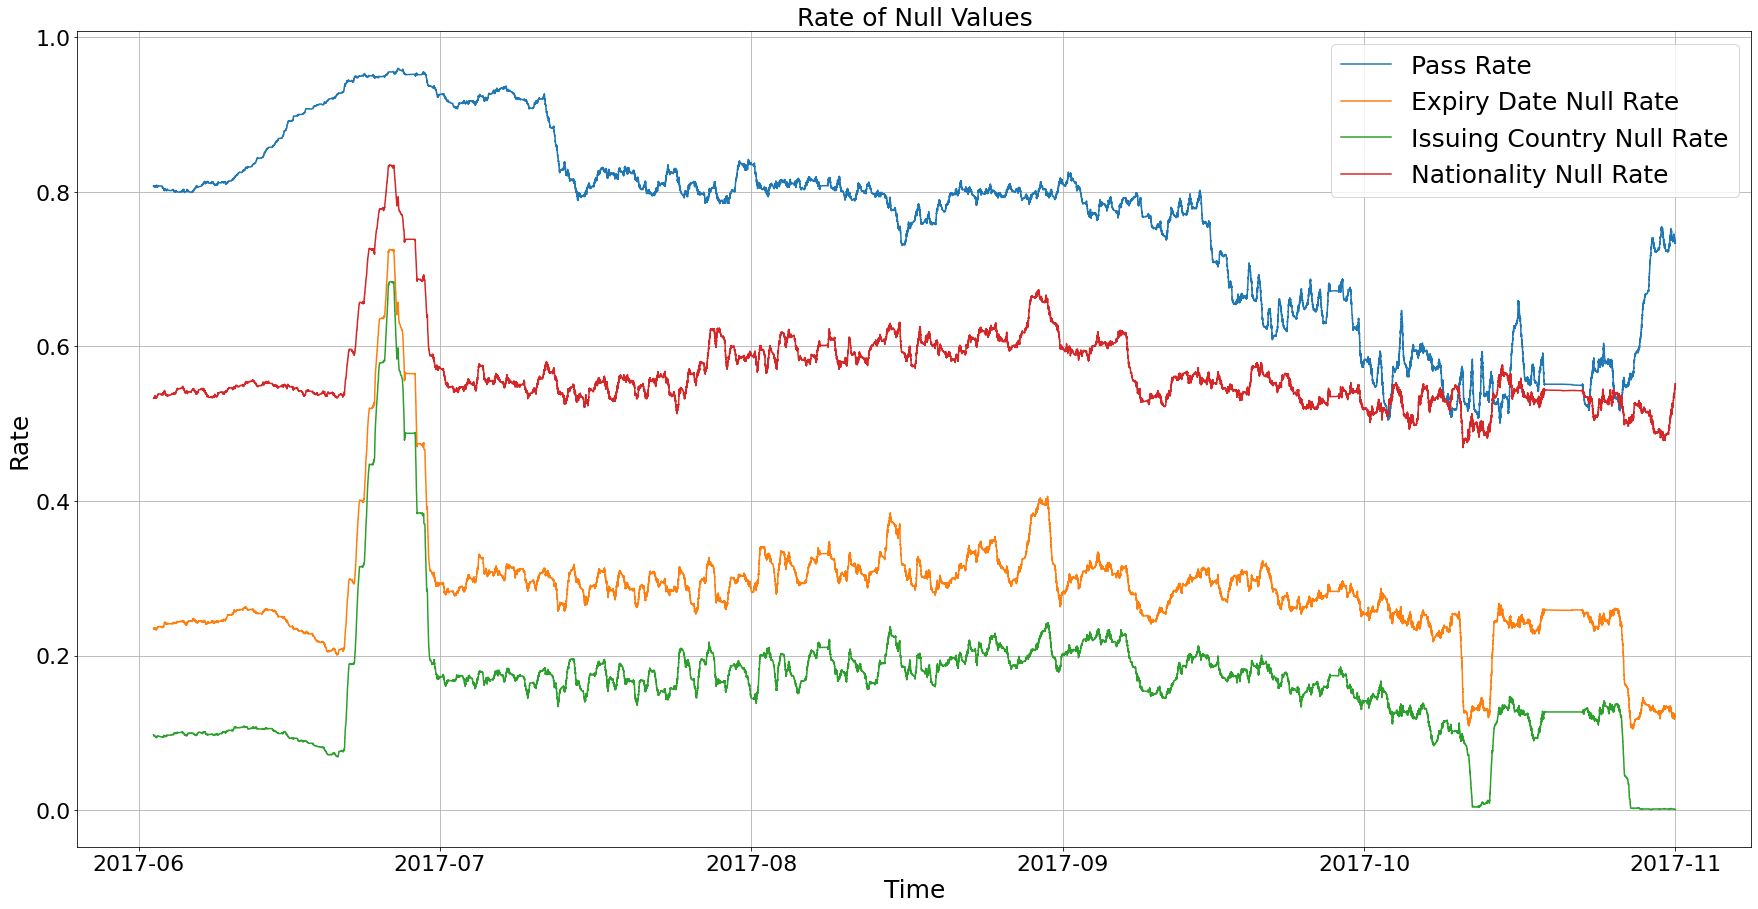

In [82]:
W = [df['pass'],'date_of_expiry','issuing_country','nationality']


plot_null_rate(W,['Pass Rate','Expiry Date Null Rate','Issuing Country Null Rate','Nationality Null Rate'],'Rate of Null Values',2000)